## Importing Libraries

Web scraping ,reading data from webpage

In [32]:
library("rvest")

Text mining

In [33]:
library("tm")

Data Manipulation

In [34]:
library("dplyr")

Text Emotional Analysis

In [35]:
library("syuzhet")

Word clouds

In [36]:
library("wordcloud")

Color Platettes

In [37]:
library("RColorBrewer")

Plotting graph

In [38]:
library("ggplot2")

# Loading web page


In [48]:
sample=read_html("https://en.wikipedia.org/wiki/Cryptocurrency")


In [49]:
sample

{xml_document}
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="skin-vector skin-vector-search-vue mediawiki ltr sitedir-ltr ...

In [50]:
sg=sample %>% html_nodes("p") %>% html_text()


In [53]:
sg

[1] "\n\n"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  [2] "A cryptocurrency, crypto-currency, or crypto[a] is a digital currency designed to work as a medium of exchange through a computer network that is not reliant on any central authority, such as a government or bank, to uphold or maintain it.[2] It is a decentralized system for verifying that the parties to a transaction have the money they claim to have, eliminating the need for traditional intermediaries, such as banks, when funds are being transferred between two entities.[3]"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
  [3] "Individual coin ownership records are stored in a digital ledger, which is a computerized database using strong cryptography to secure transaction records, control the creation of additional coins, and verify the transfer of coin ownership.[4][5][6] Despite their name, cryptocurrencies are not considered to be currencies in the traditional sense, and while varying treatments have been applied to them, including classificati

# Text Cleaning

create corpus by converting vector

In [54]:
sgd=mycorpus <- VCorpus(x = VectorSource(sg),
                     readerControl = list(reader=readPlain,
                                          language="en"))

Converting all text in lowercase

In [55]:
sgd=tm_map(sgd,content_transformer(tolower))

Removing numbers from the text

In [56]:
sgd=tm_map(sgd,removeNumbers)

Removing stopwords

In [57]:
sgd=tm_map(sgd,removeWords,stopwords("english"))

Removing Punctuations

In [58]:
sgd=tm_map(sgd,removePunctuation)

Removing white spaces

In [59]:
sgd=tm_map(sgd,stripWhitespace)

# Text mining

In [68]:
dtm=TermDocumentMatrix(sgd)


In [69]:
dtm

<<TermDocumentMatrix (terms: 2321, documents: 156)>>
Non-/sparse entries: 4787/357289
Sparsity           : 99%
Maximal term length: 73
Weighting          : term frequency (tf)

In [70]:
m=as.matrix(dtm)
v=sort(rowSums(m),decreasing = TRUE)
d=data.frame(frequency=v)
d=data.frame(word=names(v),frequency=v)
head(d,20)

,word,frequency
cryptocurrency,cryptocurrency,131
bitcoin,bitcoin,82
cryptocurrencies,cryptocurrencies,61
transaction,transaction,29
money,money,28
crypto,crypto,27
exchange,exchange,25
financial,financial,25
market,market,25
mining,mining,25


# Most frequent terms

In [71]:
findFreqTerms(dtm,lowfreq = 15)

[1] "according"        "also"             "assets"           "bank"            
 [5] "bitcoin"          "blockchain"       "can"              "crypto"          
 [9] "cryptocurrencies" "cryptocurrency"   "currency"         "digital"         
[13] "electricity"      "exchange"         "exchanges"        "financial"       
[17] "first"            "market"           "may"              "miners"          
[21] "mining"           "money"            "network"          "power"           
[25] "system"           "transaction"      "transactions"     "use"             
[29] "used"             "using"

# Association of terms

In [73]:
findAssocs(dtm,term="bank",corlimit = 0.3)

$bank
 central     cbdc    plans thailand   create 
    0.60     0.44     0.43     0.43     0.35

# Plotting frequncy

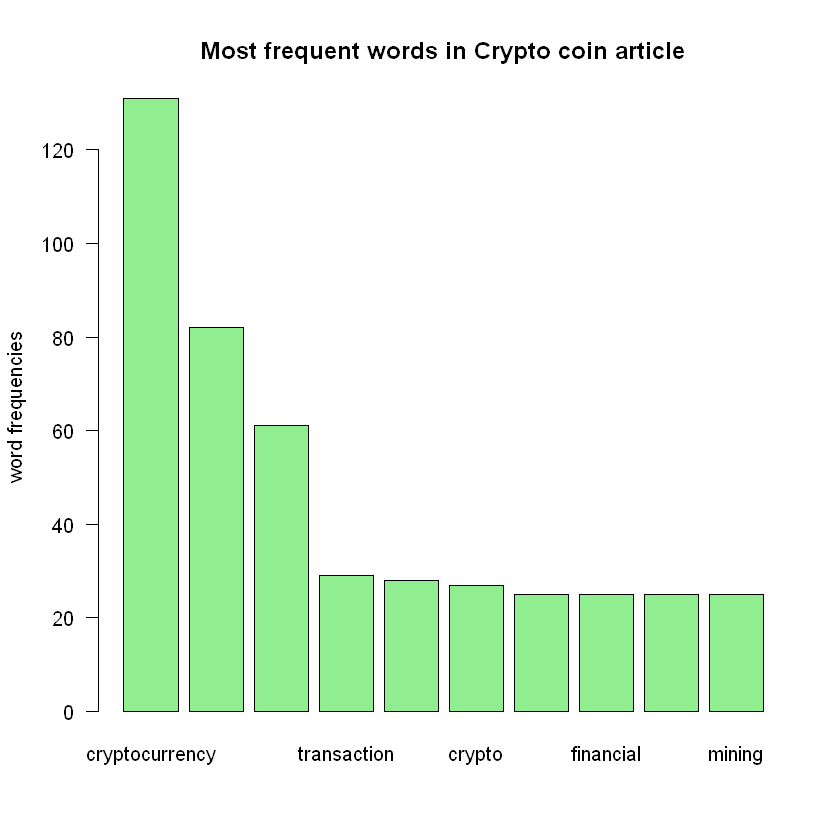

In [75]:
barplot(d[1:10,]$freq,las=1,names.arg=d[1:10,]$word,
        col="lightgreen",main="Most frequent words in Crypto coin article",
        ylab="word frequencies")


# Word Clouds

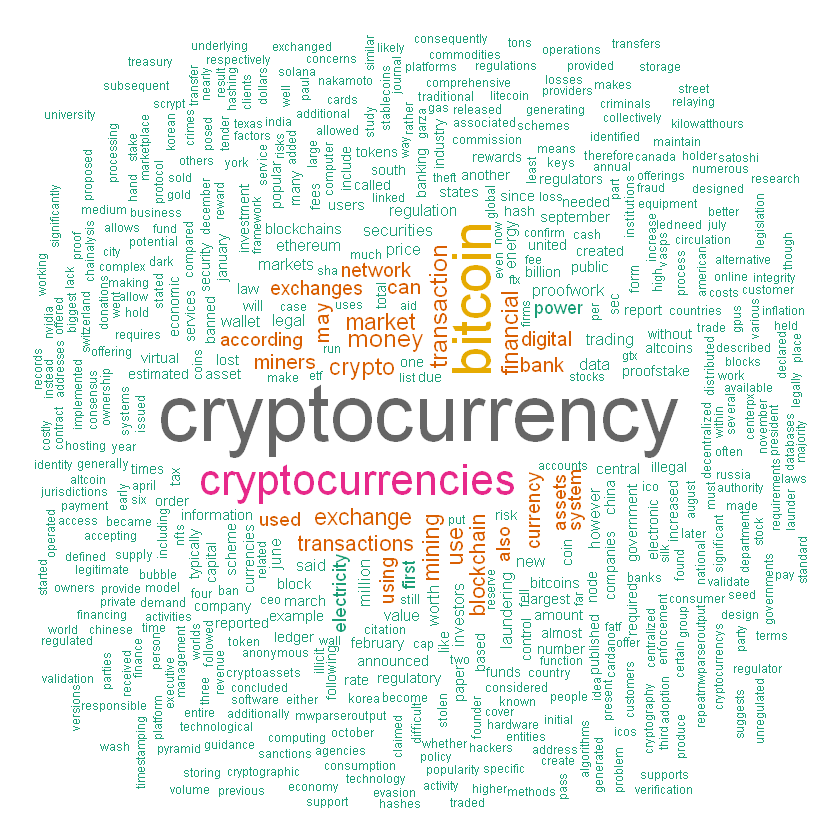

In [76]:
set.seed(1234)
wordcloud(words=d$word,freq = d$frequency,min.freq =3,max.words =500,
random.order = FALSE,rot.per =0.40,colors = brewer.pal(8,"Dark2"))

# Analysing text

Using syuzhet or bing or afinn lexicons


In [90]:
emot=get_sentiment(sg,method = "syuzhet")

Summarizing stats of the vector

In [91]:
summary(emot)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.7500 -0.4000  0.6250  0.7901  1.7250  7.0500 

In [92]:
emot=get_sentiment(sg,method = "bing")

In [93]:
summary(emot)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-6.00000 -1.00000  0.00000 -0.02564  1.00000  5.00000 

In [94]:
emot=get_sentiment(sg,method = "afinn")

In [95]:
summary(emot)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-11.0000  -2.0000   0.0000   0.3013   2.0000   9.0000 

# Using the complex lexicon for sentiments that is  nrc lexicon

In [79]:
vnrc=get_nrc_sentiment(sg)

In [96]:
vnrc

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,1,6,1,4
0,3,0,0,1,0,1,6,0,8
2,2,0,1,1,0,1,5,2,6
0,0,0,0,0,0,0,0,0,1
1,2,0,0,1,1,1,2,1,1
1,1,0,1,1,0,0,3,1,1
2,3,0,1,2,0,1,5,1,4
0,2,0,0,0,0,0,1,2,1
0,0,0,0,0,0,0,0,1,2


In [80]:
dfnrc=data.frame(t(vnrc))

In [98]:
dfnrc

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156
anger,0,1,0,2,0,1,1,2,0,0,,0,0,0,1,0,2,0,5,1,1
anticipation,0,2,3,2,0,2,1,3,2,0,,0,0,0,0,1,1,1,1,3,0
disgust,0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,1,2,0,2
fear,0,1,0,1,0,0,1,1,0,0,,0,0,0,1,0,0,0,3,2,2
joy,0,1,1,1,0,1,1,2,0,0,,0,0,0,0,0,1,0,4,1,0
sadness,0,0,0,0,0,1,0,0,0,0,,0,0,0,0,0,1,0,4,1,2
surprise,0,1,1,1,0,1,0,1,0,0,,0,0,0,0,0,1,0,2,0,0
trust,0,6,6,5,0,2,3,5,1,0,,1,2,1,0,1,1,1,8,2,1
negative,0,1,0,2,0,1,1,1,2,1,,1,0,0,2,0,3,1,8,1,2
positive,0,4,8,6,1,1,1,4,1,2,,1,5,1,2,1,1,1,7,4,0


specifing the range


In [99]:
tnrc=data.frame(rowSums(dfnrc[2:50]))

In [100]:
tnrc

,rowSums.dfnrc.2.50..
anger,21
anticipation,60
disgust,6
fear,29
joy,30
sadness,18
surprise,17
trust,104
negative,55
positive,131


## Tranforming data

In [103]:
names(tnrc)[1]="count"
tnrc=cbind("emotions"=rownames(tnrc),tnrc)
rownames(tnrc)=NULL
tnrc1=tnrc[1:15,]

## Final Visualization

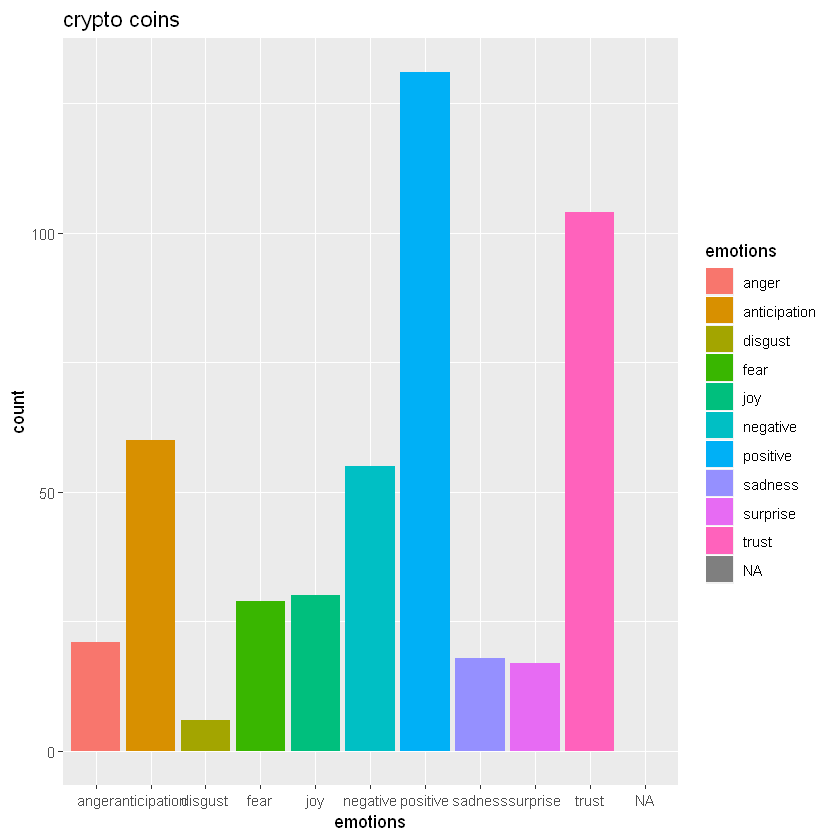

In [105]:
quickplot(emotions,data=tnrc1,weight=count,geom="bar",fill=emotions,ylab="count")+ggtitle("crypto coins")